In [2]:
import meep as mp
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
# Initialized parameter 

b = 1        # base of the square (On peut prend l'unité) 10 pixel 
pml = 0.01     # the thickness of pml layer
pad = 0.01       # the padding between the cavity and the pml layer
n = 1.5       # refractive index the cavity (used resin)
resolution = 800
len_scale = 50

sxy = b + pml + pad
cell_size = mp.Vector3(sxy, sxy, 0)

# Booudary conditions
boudary_layer = mp.PML(pml)

geometry = [mp.Block(mp.Vector3(b,b,mp.inf),
                     center=mp.Vector3(),
                     material=mp.Medium(index=n))]


# Injected sources
wl = 0.8                     # wavelenght in micrometer / in vaccum        
fcen = len_scale/(n*wl)         # pulse center frequency/ n refractive index
df = 0.1                 # pulse frequency width
src = mp.Source(mp.GaussianSource(fcen, fwidth=df), mp.Ez, mp.Vector3(0))

#Simulation
sim = mp.Simulation(cell_size= cell_size,
                    geometry= geometry,
                    sources=[src],
                    symmetries=[mp.Mirror(mp.X), mp.Mirror(mp.Y)],
                    resolution=resolution,                    
                    boundary_layers=[boudary_layer])

-----------
Initializing structure...
Halving computational cell along direction x
Halving computational cell along direction y
time for choose_chunkdivision = 0.00142503 s
Working in 2D dimensions.
Computational cell is 1.02 x 1.02 x 0 with resolution 800
     block, center = (0,0,0)
          size (1,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (2.25,2.25,2.25)
time for set_epsilon = 0.32675 s
-----------


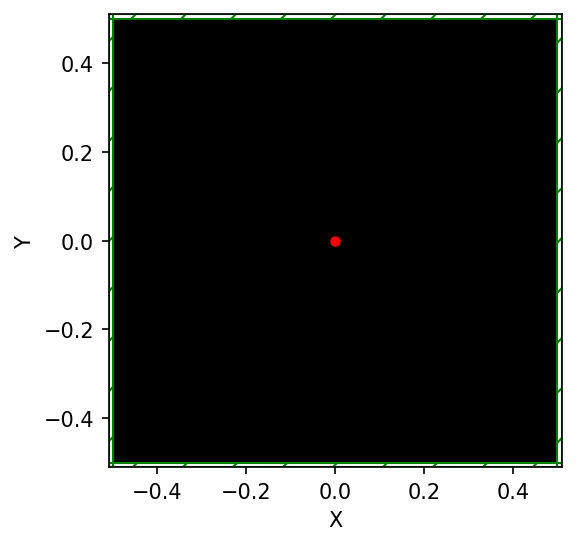

In [3]:
f = plt.figure(dpi=150)
sim.plot2D(ax = f.gca())
plt.show()

In [4]:
# define step function to collect field Ez

T = 0.6        # time step for collecting Ez
ez_fields = []
def append_Ez(sim):
    ez_fields.append(sim.get_array(center=mp.Vector3(0,0), size=mp.Vector3(0,0), component=mp.Ez))

In [6]:
# Chercher les fréquences de résonnance autour de f = 0.15

h1 = mp.Harminv(mp.Ez, mp.Vector3(0,0), fcen, df)   # Est-ce qu'on s'intéresse par les autres composants?

sim.run(mp.after_sources(h1),
        until_after_sources=600)

# after_sources : time step in finte difference is half of the period of the source

FloatProgress(value=45.458126068115234, description='0% done ', max=700.0, min=45.458126068115234)

on time step 72733 (time=45.4581), 0.0114684 s/step
Meep progress: 4.3043739318847685/700.0 = 0.6% done in 4.0s, 646.6s to go
on time step 79660 (time=49.7875), 0.000577455 s/step
Meep progress: 8.858748931884769/700.0 = 1.3% done in 8.0s, 624.2s to go
on time step 86949 (time=54.3431), 0.000548812 s/step
Meep progress: 13.188123931884768/700.0 = 1.9% done in 12.0s, 625.0s to go
on time step 93878 (time=58.6737), 0.000577352 s/step
Meep progress: 17.054998931884768/700.0 = 2.4% done in 16.0s, 640.8s to go
on time step 100064 (time=62.54), 0.000646649 s/step
Meep progress: 21.48999893188477/700.0 = 3.1% done in 20.0s, 631.5s to go
on time step 107161 (time=66.9756), 0.000563686 s/step
Meep progress: 25.603123931884767/700.0 = 3.7% done in 24.0s, 632.2s to go
on time step 113745 (time=71.0906), 0.000607576 s/step
Meep progress: 29.63999893188476/700.0 = 4.2% done in 28.0s, 633.3s to go
on time step 120200 (time=75.125), 0.000619706 s/step
Meep progress: 33.42687393188477/700.0 = 4.8% don

Meep progress: 262.47437393188477/700.0 = 37.5% done in 256.0s, 426.8s to go
on time step 492767 (time=307.979), 0.000629164 s/step
Meep progress: 266.4437489318848/700.0 = 38.1% done in 260.0s, 423.1s to go
on time step 499152 (time=311.97), 0.000626534 s/step
Meep progress: 270.2637489318848/700.0 = 38.6% done in 264.0s, 419.8s to go
on time step 505262 (time=315.789), 0.000654742 s/step
Meep progress: 274.1024989318848/700.0 = 39.2% done in 268.0s, 416.4s to go
on time step 511406 (time=319.629), 0.000651077 s/step
Meep progress: 277.8449989318848/700.0 = 39.7% done in 272.0s, 413.3s to go
on time step 517387 (time=323.367), 0.00066881 s/step
Meep progress: 281.7949989318848/700.0 = 40.3% done in 276.0s, 409.6s to go
on time step 523702 (time=327.314), 0.000633524 s/step
Meep progress: 286.0012489318848/700.0 = 40.9% done in 280.0s, 405.3s to go
on time step 530447 (time=331.529), 0.000593111 s/step
Meep progress: 290.2456239318848/700.0 = 41.5% done in 284.0s, 401.0s to go
on time 

Meep progress: 506.2099989318848/700.0 = 72.3% done in 508.0s, 194.5s to go
on time step 882805 (time=551.753), 0.00072029 s/step
Meep progress: 510.21687393188483/700.0 = 72.9% done in 512.0s, 190.5s to go
on time step 889246 (time=555.779), 0.000621037 s/step
Meep progress: 514.2656239318848/700.0 = 73.5% done in 516.0s, 186.4s to go
on time step 895718 (time=559.824), 0.000618072 s/step
Meep progress: 518.2124989318847/700.0 = 74.0% done in 520.0s, 182.4s to go
on time step 902033 (time=563.771), 0.000633437 s/step
Meep progress: 522.2537489318847/700.0 = 74.6% done in 524.0s, 178.4s to go
on time step 908507 (time=567.817), 0.000617891 s/step
Meep progress: 526.4643739318848/700.0 = 75.2% done in 528.0s, 174.1s to go
on time step 915239 (time=572.024), 0.000594218 s/step
Meep progress: 530.7137489318848/700.0 = 75.8% done in 532.0s, 169.7s to go
on time step 922038 (time=576.274), 0.000588342 s/step
Meep progress: 534.9693739318848/700.0 = 76.4% done in 536.0s, 165.4s to go
on time

In [4]:
# Chercher les fréquences de résonnance autour de f = 0.15

h2 = mp.Harminv(mp.Hx, mp.Vector3(0,0), fcen, df)   # Est-ce qu'on s'intéresse par les autres composants?

sim.reset_meep()
sim.run(mp.after_sources(h2),
        until_after_sources=600)

# after_sources : time step in finte difference is half of the period of the source

-----------
Initializing structure...
Halving computational cell along direction x
Halving computational cell along direction y
time for choose_chunkdivision = 0.0014019 s
Working in 2D dimensions.
Computational cell is 1.02 x 1.02 x 0 with resolution 800
     block, center = (0,0,0)
          size (1,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (2.25,2.25,2.25)
time for set_epsilon = 0.324392 s
-----------


FloatProgress(value=0.0, description='0% done ', max=700.0)

Meep progress: 4.40125/700.0 = 0.6% done in 4.0s, 632.2s to go
on time step 7053 (time=4.40813), 0.00056717 s/step
Meep progress: 9.018125/700.0 = 1.3% done in 8.0s, 613.0s to go
on time step 14440 (time=9.025), 0.000541522 s/step
Meep progress: 13.585625/700.0 = 1.9% done in 12.0s, 606.3s to go
on time step 21749 (time=13.5931), 0.000547385 s/step
Meep progress: 18.178125/700.0 = 2.6% done in 16.0s, 600.2s to go
on time step 29100 (time=18.1875), 0.000544211 s/step
Meep progress: 22.768125/700.0 = 3.3% done in 20.0s, 594.9s to go
on time step 36446 (time=22.7787), 0.000544543 s/step
Meep progress: 27.320625/700.0 = 3.9% done in 24.0s, 591.0s to go
on time step 43732 (time=27.3325), 0.000549042 s/step
Meep progress: 31.880625000000002/700.0 = 4.6% done in 28.0s, 586.8s to go
on time step 51028 (time=31.8925), 0.00054829 s/step
Meep progress: 36.414375/700.0 = 5.2% done in 32.0s, 583.2s to go
on time step 58282 (time=36.4263), 0.000551443 s/step
Meep progress: 40.948750000000004/700.0 =

Meep progress: 292.695625/700.0 = 41.8% done in 272.0s, 378.5s to go
on time step 468356 (time=292.723), 0.00109054 s/step
Meep progress: 294.805625/700.0 = 42.1% done in 276.0s, 379.4s to go
on time step 471728 (time=294.83), 0.0011864 s/step
Meep progress: 296.866875/700.0 = 42.4% done in 280.0s, 380.3s to go
on time step 475030 (time=296.894), 0.00121161 s/step
Meep progress: 298.9475/700.0 = 42.7% done in 284.0s, 381.0s to go
on time step 478357 (time=298.973), 0.00120259 s/step
Meep progress: 301.02125/700.0 = 43.0% done in 288.0s, 381.7s to go
on time step 481722 (time=301.076), 0.00118879 s/step
Meep progress: 305.184375/700.0 = 43.6% done in 292.0s, 377.8s to go
on time step 488379 (time=305.237), 0.000600901 s/step
Meep progress: 308.77750000000003/700.0 = 44.1% done in 296.0s, 375.1s to go
on time step 494125 (time=308.828), 0.000696142 s/step
Meep progress: 312.62875/700.0 = 44.7% done in 300.0s, 371.7s to go
on time step 500279 (time=312.674), 0.000649992 s/step
Meep progre

Meep progress: 561.915/700.0 = 80.3% done in 536.0s, 131.7s to go
on time step 899195 (time=561.997), 0.000586578 s/step
Meep progress: 565.955/700.0 = 80.9% done in 540.0s, 127.9s to go
on time step 905670 (time=566.044), 0.00061784 s/step
Meep progress: 569.938125/700.0 = 81.4% done in 544.0s, 124.2s to go
on time step 912038 (time=570.024), 0.000628197 s/step
Meep progress: 574.16/700.0 = 82.0% done in 548.0s, 120.1s to go
on time step 918797 (time=574.248), 0.00059183 s/step
Meep progress: 578.219375/700.0 = 82.6% done in 552.0s, 116.3s to go
on time step 925285 (time=578.303), 0.000616537 s/step
Meep progress: 582.434375/700.0 = 83.2% done in 556.0s, 112.2s to go
on time step 932033 (time=582.521), 0.000592784 s/step
Meep progress: 586.286875/700.0 = 83.8% done in 560.0s, 108.6s to go
on time step 938195 (time=586.372), 0.000649225 s/step
Meep progress: 589.641875/700.0 = 84.2% done in 564.0s, 105.6s to go
on time step 943520 (time=589.7), 0.000751298 s/step
Meep progress: 593.828